In [ ]:
#MNIST handwritten digit classification

!pip install tensorflow keras numpy mnist matplotlib

In [17]:
#Import packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt #graph
import numpy as np

In [ ]:
#Load data and split into train and test sets
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [22]:
#Image shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
#Reshape data to fit model
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
#One-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot[0])

In [33]:
#Model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [34]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 166s 88ms/step - loss: 0.8056 - accuracy: 0.9105 - val_loss: 0.0921 - val_accuracy: 0.9725
Epoch 2/3
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0843 - val_accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0951 - val_accuracy: 0.9754


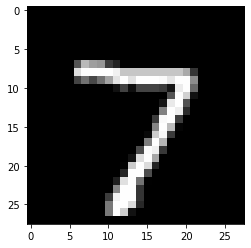

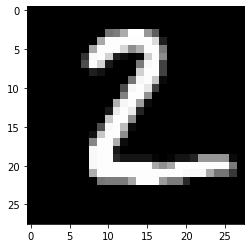

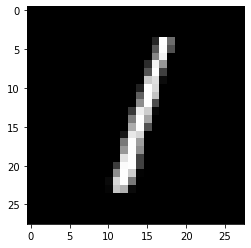

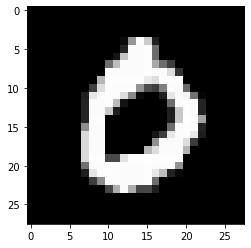

In [45]:
#show the first 4 images as pictures
for i in range(0,4):
  image = x_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape(28,28)
  plt.imshow(pixels, cmap='gray')
  plt.show()